<a href="https://colab.research.google.com/github/mehaktech/project/blob/main/smsspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in the dataset: label      0
message    0
dtype: int64


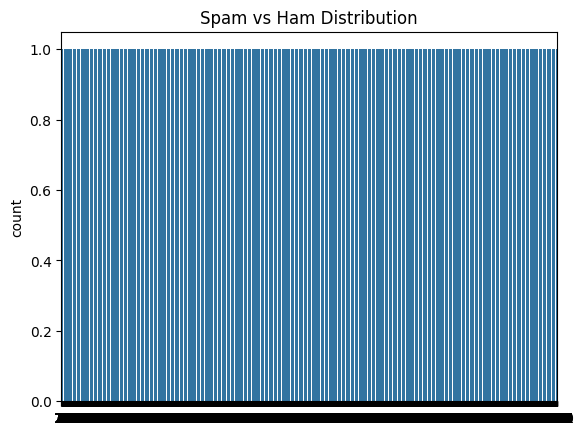

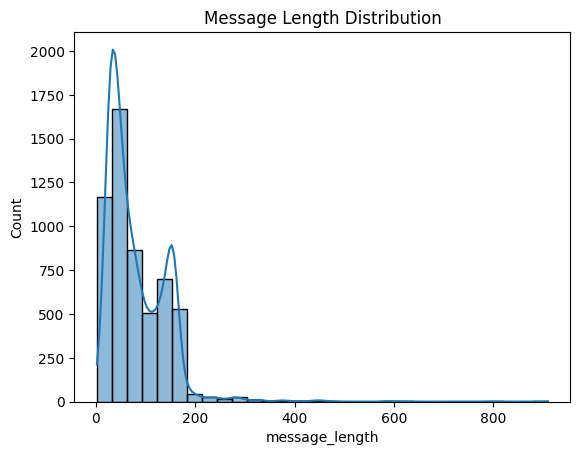

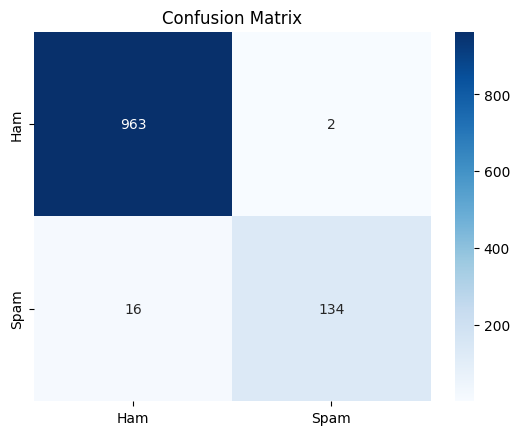

Accuracy: 98.39%


In [8]:
# Step 1: Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 2: Reading the CSV file
url = "https://raw.githubusercontent.com/mohitgupta-1O1/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
data = pd.read_csv(url, encoding='latin-1')

# Step 3: Cleaning the data
# Dropping unnecessary columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Renaming columns for easier access
data.columns = ['label', 'message']

# Converting label to a binary variable
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Checking for missing values
print("Missing values in the dataset:", data.isnull().sum())

# Step 4: Visualizing the clean data
# Visualize the distribution of labels
sns.countplot(data['label'])
plt.title('Spam vs Ham Distribution')
plt.show()

# Visualizing the length of messages
data['message_length'] = data['message'].apply(len)
sns.histplot(data['message_length'], bins=30, kde=True)
plt.title('Message Length Distribution')
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.show()

# Step 5: Machine learning
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
